In [1]:
import pandas as pd
import requests

In [2]:
# Chave da API obtida no RapidAPI
headers = {
    'x-rapidapi-host': "currency-exchange.p.rapidapi.com",
    'x-rapidapi-key': "97b52f616amsh8ff4be3f936deefp1bcff9jsne88fc0d9a374"
}

url = "https://currency-exchange.p.rapidapi.com/exchange"

# Lista de parâmetros para as conversões desejadas
parametros = [
    {"from": "USD", "to": "EUR", "q": "1.0"},
    {"from": "SGD", "to": "MYR", "q": "1.0"},
    {"from": "CAD", "to": "VES", "q": "1.0"}
]

# Lista de resultados
resultados = []

# Loop para processar cada conversão
for params in parametros:
    #requisição GET com os parametros desejados (parametros)
    response = requests.get(url, headers=headers, params=params)
    if response.status_code == 200:
        # Sendo a resposta bem sucedida (code=200) converte a resposta em texto
        exchange_rate = response.text
        # o texto resultado vai para o dicionario 'resultados'
        resultados.append({
            'Moeda Origem': params['from'],
            'Moeda Destino': params['to'],
            'Quantidade': params['q'],
            'Taxa de Câmbio': exchange_rate
        })

# DataFrame com os resultados
df = pd.DataFrame(resultados)

# Arquivo a ser criado
file_name = 'LEAO_PEREIRA.xlsx'
df.to_excel(file_name, index=False)

print(f"Arquivo '{file_name}' salvo com sucesso!")


Arquivo 'LEAO_PEREIRA.xlsx' salvo com sucesso!


## Exploração da base de dados

* Composiçaõ das primeiras linhas

In [3]:
df.head()

,Moeda Origem,Moeda Destino,Quantidade,Taxa de Câmbio
0,USD,EUR,1.0,0.9234199999999999
1,SGD,MYR,1.0,3.513191178
2,CAD,VES,1.0,26.66954317


* tipos dos dados

In [4]:
df.dtypes

Moeda Origem      object
Moeda Destino     object
Quantidade        object
Taxa de Câmbio    object
dtype: object

* Conversão do tipo para um dado que mantenha a maior precisão e ainda possa ser analisado

In [5]:
df['Taxa de Câmbio'] = df['Taxa de Câmbio'].astype(object).astype(float)

df.dtypes

Moeda Origem       object
Moeda Destino      object
Quantidade         object
Taxa de Câmbio    float64
dtype: object

* verificação da existencia de nulos ou vazios

In [6]:
df.isna().sum() / len(df)

Moeda Origem      0.0
Moeda Destino     0.0
Quantidade        0.0
Taxa de Câmbio    0.0
dtype: float64

* obtenção das médias e quartis

In [7]:
df.describe()

,Taxa de Câmbio
count,3.000000
mean,10.368718
std,14.176191
min,0.923420
25%,2.218306
50%,3.513191
75%,15.091367
max,26.669543


* Visualização simples do describe

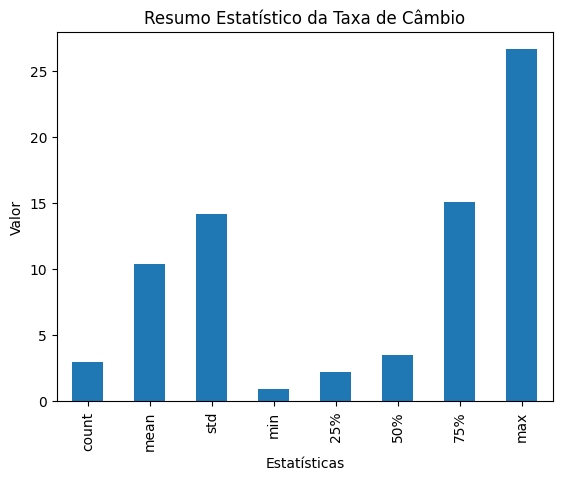

In [10]:
import matplotlib.pyplot as plt
descricao = df['Taxa de Câmbio'].describe()

# Agora, vamos plotar um gráfico de barras para visualizar o resumo estatístico
descricao.plot(kind='bar')

# Adicione títulos e rótulos para clareza
plt.title('Resumo Estatístico da Taxa de Câmbio')
plt.xlabel('Estatísticas')
plt.ylabel('Valor')

# Exiba o gráfico
plt.show()